In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [237]:
# 모델 아키택처 생성

model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu6', input_shape=(96,96,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu6'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu6'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu6'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu6'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu6'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_339 (Conv2D)         (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 48, 48, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_59 (Dropout)        (None, 48, 48, 16)        0         
                                                                 
 conv2d_340 (Conv2D)         (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 24, 24, 32)      

Data shape: (13160, 96, 96, 3)
Labels: (13160, 3)
[0 1 0]


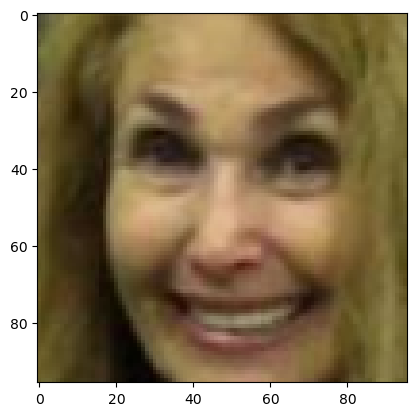

In [217]:
# 학습 데이터 구축

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

mask_path = "train"

data = []
labels = []

for dty in os.listdir(mask_path):
    dty_path = os.path.join(mask_path, dty)
    if dty == 'with_mask':
        label = (1,0,0)
    elif dty == "without_mask":
        label = (0,1,0)
    else:
        # 사람이 없는 이미지
        label = (0,0,1)
    
    if os.path.isdir(dty_path):
        for file in os.listdir(dty_path):
            file_path = os.path.join(dty_path, file)
            
            try:
                image = cv2.imread(file_path)
                if image is not None and image.size > 0:
                    
                    # 96* 96 * 3으로 resize
                    image = cv2.resize(image, (96,96))
                    # cv가 BGR로 읽어옴
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
                    data.append(image)
                    labels.append(label)
            except Exception as e:
                print(flie_path)

data = np.array(data)
labels = np.array(labels)

print("Data shape:",data.shape)
print("Labels:",labels.shape)
indices = np.arange(len(data))

np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]
plt.imshow(data[0])
print(labels[0])

In [218]:
# train, valid, test 데이터 분리
x_train = data.astype('float32') / 255.0

x_test = x_train[11000:]
y_test = labels[11000:]

x_valid = x_train[9000:11000]
y_valid = labels[9000:11000]

x_train = x_train[:9000]
y_train = labels[:9000]

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


(9000, 96, 96, 3)
(2000, 96, 96, 3)
(2160, 96, 96, 3)
(9000, 3)
(2000, 3)
(2160, 3)


In [238]:
# 파라미터는 자유롭게 조절
hist = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data=(x_valid,y_valid))

Epoch 1/10
282/282 [==============================] - 12s 39ms/step - loss: 0.3268 - accuracy: 0.8739 - val_loss: 0.2600 - val_accuracy: 0.9025
Epoch 2/10
282/282 [==============================] - 12s 42ms/step - loss: 0.1871 - accuracy: 0.9349 - val_loss: 0.2018 - val_accuracy: 0.9375
Epoch 3/10
282/282 [==============================] - 12s 44ms/step - loss: 0.1640 - accuracy: 0.9409 - val_loss: 0.1441 - val_accuracy: 0.9520
Epoch 4/10
282/282 [==============================] - 13s 46ms/step - loss: 0.1469 - accuracy: 0.9471 - val_loss: 0.1251 - val_accuracy: 0.9550
Epoch 5/10
282/282 [==============================] - 13s 46ms/step - loss: 0.1406 - accuracy: 0.9492 - val_loss: 0.1131 - val_accuracy: 0.9615
Epoch 6/10
282/282 [==============================] - 13s 46ms/step - loss: 0.1111 - accuracy: 0.9583 - val_loss: 0.0826 - val_accuracy: 0.9730
Epoch 7/10
282/282 [==============================] - 13s 47ms/step - loss: 0.0983 - accuracy: 0.9672 - val_loss: 0.0856 - val_accuracy:

In [239]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print("Test set Loss and Accuracy")
print(loss_and_acc)

68/68 [==============================] - 1s 9ms/step - loss: 0.0678 - accuracy: 0.9764
Test set Loss and Accuracy
[0.06775754690170288, 0.9763888716697693]


(1, 96, 96, 3)
1/1 [==============================] - 0s 25ms/step
Predictions:  [[1.7507763e-04 9.9981004e-01 1.4930683e-05]]


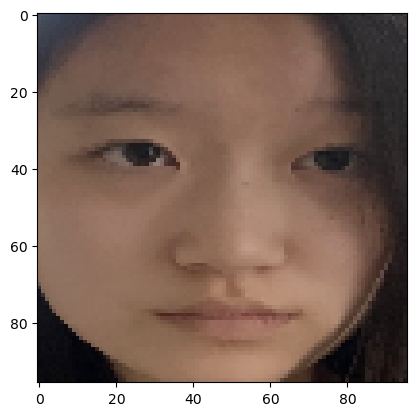

In [236]:
# 원하는 이미지로 테스트
image = cv2.imread('data/no_mask2.jpg')
image = cv2.resize(image, (96,96))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)

plt.imshow(image)
image = image / 255.0  # 정규화 (예: 0-1 범위로 조정)
image = np.expand_dims(image, axis=0)  # 배치 차원 추가
print(image.shape)

prediction = model.predict(image)
print("Predictions: ", prediction)

In [241]:
# int8 양자화하여 tflite 파일로 변환

def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 96, 96, 3)
      yield [data.astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()
with open('model_3_RGB_int8.tflite','wb') as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpg_kuo4hl\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpg_kuo4hl\assets
C:\Users\user\anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
